In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
banking = pd.read_csv("C:\\Users\\hparasa\\Documents\\Datasets\\Pavan_Sir_Datasets\\Banking_Dataset.csv")
banking_df = banking.drop(['y','pdays'], axis=1)
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [3]:
#print(banking_df.shape)
#print(banking_df.axes)
#print(banking_df.dtypes)
for x in banking_df.columns:
    print(banking_df[x].value_counts())

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype:

In [4]:
print(banking_df['job'].value_counts(),"\n")
print(banking_df['marital'].value_counts(),"\n")
print(banking_df['education'].value_counts(),"\n")
print(banking_df['default'].value_counts(),"\n")
print(banking_df['housing'].value_counts(),"\n")
print(banking_df['loan'].value_counts(),"\n")
print(banking_df['contact'].value_counts(),"\n")
print(banking_df['month'].value_counts(),"\n")
print(banking_df['day_of_week'].value_counts(),"\n")

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     717

In [5]:
categorical_df = banking_df[['job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','previous']]
categorical_df['campaign'] = categorical_df['campaign'].astype(str)
categorical_df['previous'] = categorical_df['previous'].astype(str)
categorical_dummies_df = pd.get_dummies(categorical_df, drop_first= True)
categorical_dummies_df.head()

C:\Users\hparasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hparasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,campaign_7,campaign_8,campaign_9,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
numerical_df = banking_df[['duration','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]

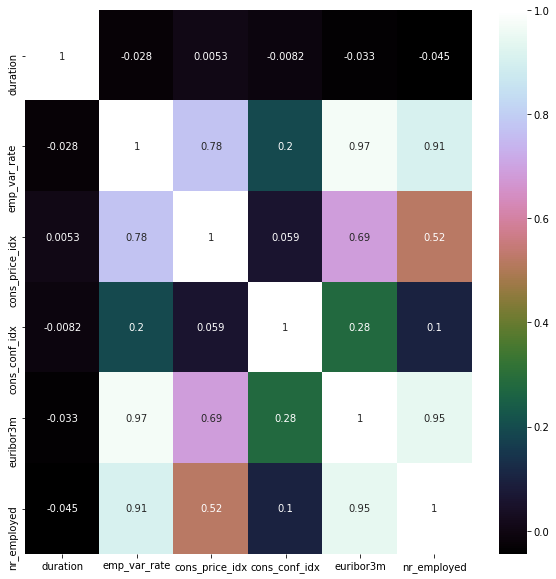

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_df.corr(), cmap="cubehelix", annot=True)

In [8]:
#removing emp_var_rate variable:
#1)as it has more correlation with nr_employed
#2)as it has more correlation cons_price_idx

#keeping nr_employed:
#1)as it has less correlation with cons_price_idx
#2)as it has more correlation with euribor3m
new_df1 = numerical_df.drop('emp_var_rate',axis=1)

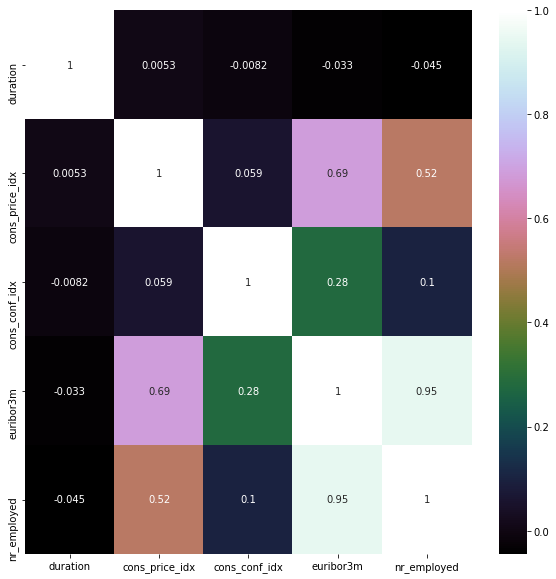

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df1.corr(), cmap="cubehelix", annot=True)

In [10]:
std = StandardScaler()
y = numerical_df['euribor3m']
newdf2 = numerical_df.drop('euribor3m', axis=1)
numerical_df_std = pd.DataFrame(std.fit_transform(newdf2))
numerical_df_std.columns = newdf2.columns
main_df = pd.concat([categorical_dummies_df,numerical_df_std], axis=1)
main_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_3,previous_4,previous_5,previous_6,previous_7,duration,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.186230,0.839061,-0.227465,0.951267,0.845170
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,-0.463926,-0.115781,-0.649003,-0.323542,0.398115
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.311309,-1.134279,0.828107,0.151810,-2.428157
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.282652,-1.197935,-0.864955,-1.425496,-0.940281
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,-0.467783,-1.898153,-2.374889,1.966794,-1.257233


In [11]:
X = main_df.copy()
X.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_3,previous_4,previous_5,previous_6,previous_7,duration,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.186230,0.839061,-0.227465,0.951267,0.845170
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,-0.463926,-0.115781,-0.649003,-0.323542,0.398115
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.311309,-1.134279,0.828107,0.151810,-2.428157
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.282652,-1.197935,-0.864955,-1.425496,-0.940281
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,-0.467783,-1.898153,-2.374889,1.966794,-1.257233


In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=10000)

C:\Users\hparasa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# MODEL BUILDING 

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# PREDICTION

In [14]:
y_pred = lm.predict(X_test)

#calculation r-square value using all the 
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

-2458666.608132249


In [15]:
# RFE with 10 features
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe_10 = RFE(lm, n_features_to_select =10, step=1)

# fit with 10 features
rfe_10.fit(X_train, y_train)

# Printing the boolean results
print(rfe_10.support_)           
print(rfe_10.ranking_)  
print(len(rfe_10.ranking_))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False  True  True False  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False  True  True  True]
[43 62 83 71 42 53 78 65 67 54 23 66 80 68 76 72 70 24 51 49 69 79 55 73
 63 74 82 60 31  1 50  1  1  5  1  1  1 36 59 35 37 32 34 27 84 39 26 33
 48 22 52 58 15 14 75 61 45 64 10 38 13  8 46 30 25  3 81 47 57  6 11 44
 17  7 12 56 40 77 29 28 18 41 21 16 20 19  9  4  1 85  2  1  1  1]
94


In [16]:
y_pred = rfe_10.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))
#getting r-squared value 0.995 for 86 features

0.9944167625611475


In [17]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_15
col_10 = X_train.columns[rfe_10.support_]

# subsetting training data for 15 selected columns
X_train_rfe_10 = X_train[col_10]

# add a constant to the model
X_train_rfe_10 = sm.add_constant(X_train_rfe_10)
X_train_rfe_10.head()

,const,month_dec,month_jun,month_mar,month_nov,month_oct,month_sep,previous_7,cons_price_idx,cons_conf_idx,nr_employed
14027,1.0,0,0,0,0,0,0,0,0.591424,-0.474791,0.84517
16449,1.0,0,0,0,0,0,0,0,0.591424,-0.474791,0.84517
5697,1.0,0,0,0,0,0,0,0,0.591424,-0.474791,0.84517
33558,1.0,0,0,0,0,0,0,0,0.591424,-0.474791,0.84517
16619,1.0,0,0,0,0,0,0,0,0.591424,-0.474791,0.84517


In [18]:
# fitting the model with 15 variables
lm_10 = sm.OLS(y_train, X_train_rfe_10).fit()   
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:              euribor3m   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.945e+05
Date:                Sun, 20 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:35:32   Log-Likelihood:                 17449.
No. Observations:               28831   AIC:                        -3.488e+04
Df Residuals:                   28820   BIC:                        -3.479e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6382      0.001   3944.

In [23]:
n_features_list = list(range(3, 11))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(3, 11):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]
    if n_features == 5:
        print(col_n)

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))


Index(['month_jun', 'month_oct', 'month_sep', 'cons_price_idx', 'nr_employed'], dtype='object')


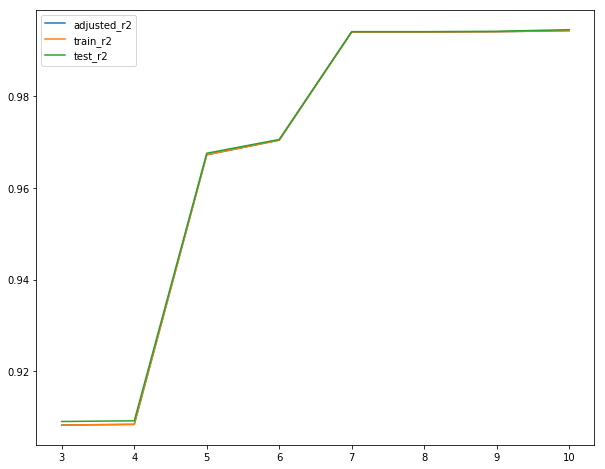

In [20]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [21]:
# # RFE with 5 features
# from sklearn.feature_selection import RFE

# lm = LinearRegression()
# rfe_5 = RFE(lm, n_features_to_select =20, step=1)

# # fit with 5 features
# rfe_5.fit(X_train, y_train)

# col_5 = X_train.columns[rfe_5.support_]
# print(col_5)

In [22]:
# X_train_rfe_5 = X_train[col_5]
# lm_5 = sm.OLS(y_train, X_train_rfe_5).fit()
# lm_5.summary()